Actividad 1

	Análisis descriptivo de los datos:

•	++++De las variables numéricas, halla datos estadísticos.
•	++++De las variables categóricas, lista las diferentes categorías y halla la frecuencia de cada una de ellas. 
•	++++Crea matriz de correlaciones existentes entre las variables numéricas del conjunto de datos y analiza los resultados. 
	++++Tratamiento de missing. Si existen valores faltantes, decide si eliminar los registros o llenarlos con valores como la media, la mediana o la moda, y justifica tu respuesta. 
	++++Aplica árboles y random forest al problema de regresión.
	++++Compara, mediante las medidas que te parezcan adecuadas, la capacidad predictiva de ambos métodos. 
	++++Comenta las ventajas y desventajas de cada modelo. De acuerdo con los resultados, ¿son realmente útiles los modelos creados para el conjunto de datos propuesto? 
	++++Para el ejercicio de clasificación, tanto para árboles como para random forest, se crean los siguientes grupos: grupo 1 (SalePrice menor o igual a 100 000), grupo 2 (SalePrice entre 100 001 y 500 000) y grupo 3 SalePrice (mayor o igual a 500 001).
	++++Compara los resultados de los dos clasificadores y comenta los resultados. 
	Otros comentarios que consideres adecuados.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor , export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import plot_tree
#Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
%matplotlib inline
#metricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn import metrics
from funpymodeling.exploratory import freq_tbl , profiling_num
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [3]:
#leer los datos de los archivos train y test
data_train = pd.read_csv("housing_train.csv")
data_test = pd.read_csv("housing_test.csv")
#se concatenan los 2 archivos para su mejor análisis.
frames = [data_train,data_test]
data = pd.concat(frames)
#sacamos el promedio de los precios de venta para llenar los Null que existan.
prom = data["SalePrice"].mean()
data["SalePrice"].fillna(prom , inplace = True)
data_c = data

In [4]:
#analisis estadisticos de variables numericas
data_numericos = profiling_num(data)
data_numericos

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Id,1460.000000,842.787043,0.577251,30.18,146.90,730.5,1460.00000,2189.50000,2773.10,2889.82
1,MSSubClass,57.137718,42.517628,0.744125,20.00,20.00,20.0,50.00000,70.00000,160.00,190.00
2,LotFrontage,69.305795,23.344905,0.336839,21.00,32.00,59.0,68.00000,80.00000,107.00,135.68
3,LotArea,10168.114080,7886.996359,0.775660,1680.00,3182.00,7478.0,9453.00000,11570.00000,17142.90,33038.64
4,OverallQual,6.089072,1.409947,0.231554,3.00,4.00,5.0,6.00000,7.00000,8.00,10.00
5,OverallCond,5.564577,1.113131,0.200039,3.00,4.00,5.0,5.00000,6.00000,8.00,9.00
6,YearBuilt,1971.312778,30.291442,0.015366,1900.00,1915.00,1953.5,1973.00000,2001.00000,2007.00,2008.00
7,YearRemodAdd,1984.264474,20.894344,0.010530,1950.00,1950.00,1965.0,1993.00000,2004.00000,2007.00,2009.00
8,MasVnrArea,102.201312,179.334253,1.754716,0.00,0.00,0.0,0.00000,164.00000,466.50,771.05
9,BsmtFinSF1,441.423235,455.610826,1.032141,0.00,0.00,0.0,368.50000,733.00000,1274.00,1635.32


In [5]:
#Analisis estadisticos de datos categoricos
data_categoricos= freq_tbl(data)

  MSZoning  frequency  percentage  cumulative_perc
0       RL       2265    0.775951         0.777015
1       RM        460    0.157588         0.934820
2       FV        139    0.047619         0.982504
3       RH         26    0.008907         0.991424
4  C (all)         25    0.008565         1.000000

----------------------------------------------------------------

  Street  frequency  percentage  cumulative_perc
0   Pave       2907    0.995889         0.995889
1   Grvl         12    0.004111         1.000000

----------------------------------------------------------------

  Alley  frequency  percentage  cumulative_perc
0  Grvl        120    0.041110         0.606061
1  Pave         78    0.026721         1.000000

----------------------------------------------------------------

  LotShape  frequency  percentage  cumulative_perc
0      Reg       1859    0.636862         0.636862
1      IR1        968    0.331620         0.968482
2      IR2         76    0.026036         0.99451

5    CarPort         15    0.005139         1.000000

----------------------------------------------------------------

  GarageFinish  frequency  percentage  cumulative_perc
0          Unf       1230    0.421377         0.445652
1          RFn        811    0.277835         0.739493
2          Fin        719    0.246317         1.000000

----------------------------------------------------------------

  GarageQual  frequency  percentage  cumulative_perc
0         TA       2604    0.892086         0.943478
1         Fa        124    0.042480         0.988406
2         Gd         24    0.008222         0.997101
3         Po          5    0.001713         0.998913
4         Ex          3    0.001028         1.000000

----------------------------------------------------------------

  GarageCond  frequency  percentage  cumulative_perc
0         TA       2654    0.909215         0.961594
1         Fa         74    0.025351         0.988406
2         Gd         15    0.005139         0.993

Text(0.5, 1.0, 'Matriz de Correlaciones')

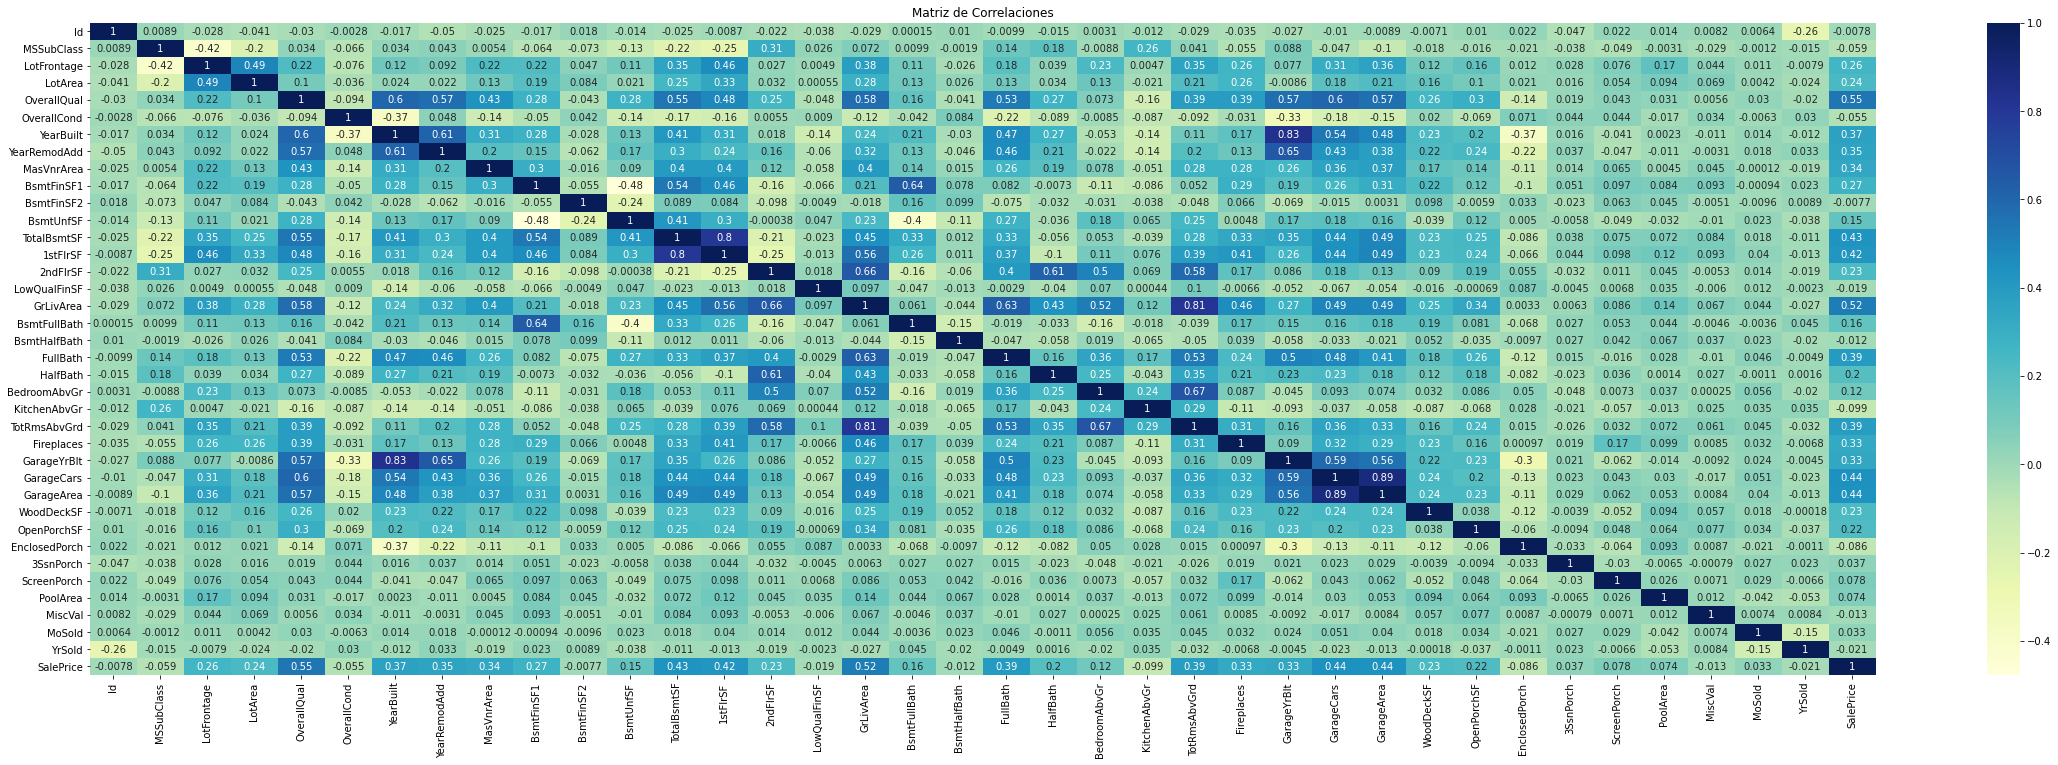

In [6]:
#Matriz de correlacion de datos numericos
df= data.select_dtypes(include=["int64" , "float64"])
plt.figure(figsize = (40,12))
heatmap = sns.heatmap(df.corr(),annot=True , cmap = "YlGnBu" )
heatmap.set_title("Matriz de Correlaciones" )

In [8]:
#Al aplicar el Encoder , llenamos los datos faltantes, caracteres extraños o NaN que existan en los datos
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
#data = data.apply(le.inverse_transform)
#Separamos los datos de test y train.
train,test = train_test_split(data,test_size = 0.2)

In [9]:
#variables dependientes e independientes
train_x = train[[ 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]
train_y = train[[ 'SalePrice']]

test_x = test[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]
test_y = test[['SalePrice']]

In [10]:
#Aplicamos Regresion con Arboles de desicion y entrenamos el modelo
modelo = DecisionTreeRegressor()
modelo.fit (train_x,train_y)
prediccion_arb = modelo.predict(test_x)
#Evaluacion del modelo
print("SVM" , metrics.accuracy_score(prediccion_arb,test_y))
print("MAE" , mean_absolute_error(test_y, prediccion_arb))
print("MSE" , mean_squared_error(test_y , prediccion_arb))
print("R2" , r2_score(test_y,prediccion_arb))

SVM 0.5256849315068494
MAE 26.892123287671232
MSE 3081.707191780822
R2 0.7943841046703279


Podado de arbol y estructura final
ccp_alpha determina el grado de penalizacion por complejidad

Profundidad del arbol : 9
Numero de nodos terminales :  50


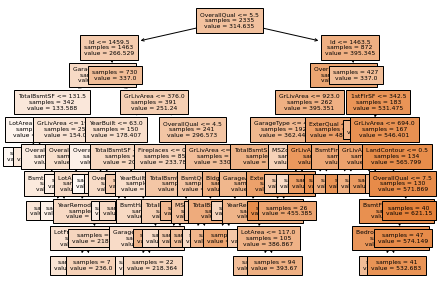

In [11]:
#valores de ccp_alpha evaluados
param_grid = {"ccp_alpha" :np.linspace(0,50,20)}
#busqueda por validacion cruzada
grid = GridSearchCV(
                #el arbol se crece al maximo posible para luego aplicar el pruning
                estimator = DecisionTreeRegressor(
                                                max_depth = None,
                                                min_samples_split=20,
                                                min_samples_leaf=1,
                                                random_state=123
                                                ),
                param_grid = param_grid,
                cv = 10,
                refit = True,
                return_train_score = True
                )

grid.fit (train_x , train_y)
modelo_final = grid.best_estimator_
#print(f"Profundidad del arbol : {modelo_final.get_depth()}")
#print(f"Numero de nodos terminales :  {modelo_final.get_n_leaves()}" )
#estrucuta final
modelo_final = grid.best_estimator_
print(f"Profundidad del arbol : {modelo_final.get_depth()}")
print(f"Numero de nodos terminales :  {modelo_final.get_n_leaves()}" )

fig,ax = plt.subplots(figsize = (7,5))
plot = plot_tree(
                decision_tree = modelo_final,
                feature_names = test_x.columns,
                class_names = "SalePrices",
                filled = True,
                fontsize = 6,
                impurity = False,
                ax = ax
)

Predicciones y evaluacion de metricas finales del abrol de desicion podado

In [14]:
prediccion_final = modelo_final.predict(test_x)
print("MAE" , mean_absolute_error(test_y , prediccion_final ))
print("MSE" , mean_squared_error(test_y , prediccion_final))
print("R2" , r2_score(test_y,prediccion_final))

MAE 28.373971566506814
MSE 3062.9074631743947
R2 0.795638449352936


Aplicamos ahora Random Forest para el mismo conjunto de datos de entrenamiento

In [15]:
#Creacion del modelo Random Forest y entrenamiento
rf_model = RandomForestRegressor(
                                n_estimators=25,
                                criterion = "mse",
                                max_depth = None,
                                max_features = "auto",
                                oob_score = False,
                                n_jobs = -1 ,
                                random_state = 123
)
rf_model.fit(train_x,train_y)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10120/2383570320.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(train_x,train_y)


RandomForestRegressor(n_estimators=25, n_jobs=-1, random_state=123)

In [16]:
#Evaluacion del modelo Random Forest

prediccion_rd = rf_model.predict(test_x)
#Evaluacion del modelo
#print("SVM" , metrics.accuracy_score(prediccion_rd,test_y))
print("MAE" , mean_absolute_error(test_y, prediccion_rd))
print("MSE" , mean_squared_error(test_y , prediccion_rd))
print("R2" , r2_score(test_y,prediccion_rd))

MAE 20.58027397260274
MSE 1891.859287671233
R2 0.8737724523894539


In [ ]:
Lista de importancia de cada variable para la regresion de Random Forest y Arboles de decision , Ademas de la creacion de un arbol extra para su exactitud.

In [18]:

x = data.drop(["SalePrice"] , axis = 1) #generamos la matriz de datos sin considerar las etiquetas
y = data["SalePrice"] #generamos un vector de etiquetas
model_var = ExtraTreesRegressor()#se inicia el modelo
model_var.fit(train_x,train_y)#se entrena el modelo
importancia_predictores = pd.DataFrame(
                                        {"Caracteristicas" : x.columns,
                                        "Importancia" : model_var.feature_importances_}
                                        )
print("Importancia de las caracteristicas en el modelo")
importancia_predictores.sort_values("Importancia" , ascending = False)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10120/1283924585.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_var.fit(train_x,train_y)#se entrena el modelo


Importancia de las caracteristicas en el modelo


,Caracteristicas,Importancia
0,Id,0.311383
17,OverallQual,0.096795
46,GrLivArea,0.095448
27,ExterQual,0.058689
19,YearBuilt,0.035174
...,...,...
71,PoolArea,0.000355
45,LowQualFinSF,0.000351
74,MiscFeature,0.000304
5,Street,0.000262


Comenta las ventajas y desventajas de cada modelo. De acuerdo con los resultados, ¿son realmente útiles los modelos creados para el conjunto de datos propuesto? 

El modelo de Arboles de desicion resulto tener un poco menos de confiabilidad que Random Forest, esto debido a la gran cantidad de datos que el algoritmo de desiciones tiene que usar. Al momento de usar Random Forest y clasificarlos en diferentes arboles ( y no en uno solo como lo hace el algoritmo de Arboles de desicion), se puede obtener mas fiabilidad.

Discretizando los datos para SalePrices

grupo 1 (SalePrice menor o igual a 100 000)
grupo 2 (SalePrice entre 100 001 y 500 000) 
grupo 3 SalePrice (mayor o igual a 500 001).

Modelo de arbol de Clasificacion

Se crea una nueva columna con las etiquetas Grupo1, Grupo2 y Grupo3, las etiquetas se asignaran dependiendo SalePrice

Analizamos y observa que la variable objetivo posee diferentes categorias(grupo 1, grupo 2 y grupo 3)
convertimos esta variable a una salida binaria. Si SalePrice > 180000 es igual a barata , 
caso contrario igual a cara con respecto al promedio general de SalePrice (180921.19589)

In [20]:
#Se empeiza a cortar a hacer los grupos con respecto a los precios de las casas

data_c["Clasificacion"] = pd.cut(data_c["SalePrice"], bins=[34900, 100000, 500000, 755000],labels=["Grupo1", "Grupo2", "Grupo3"])

In [21]:
#comprobamos que se crearon las nuevas etiquetas.
col = data_c["SalePrice"]
col2= data_c["Clasificacion"]
print(data_c.head(20))

    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       

In [22]:
data_c["Clasificacion"].value_counts()

Grupo2    2787
Grupo1     122
Grupo3       9
Name: Clasificacion, dtype: int64

In [23]:
#dividimos el conjunto de datos en (X) variables de caracteristicas y (Y) variable objeto
data_c = data_c.apply(le.fit_transform)
X = data_c[["SalePrice" , "Clasificacion"]]
Y =data_c["Clasificacion"]

Modelo de arbol de clasificaicon

Determinal el conjunto de modelizacion y el de validacion


In [24]:
x_train,x_test , y_train , y_test = train_test_split(X ,Y ,train_size = 0.5 , random_state = 0)
#entrenar el modelo
modelo_arb_c = DecisionTreeClassifier(random_state = 1)
modelo_arb_c.fit(x_train,y_train)
predicciones = modelo_arb_c.predict(X = x_test,)
print(classification_report(y_test , predicciones))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        63
           1       1.00      1.00      1.00      1395
           2       1.00      1.00      1.00         2

    accuracy                           1.00      1460
   macro avg       0.99      1.00      1.00      1460
weighted avg       1.00      1.00      1.00      1460



Metricas Cross_validation [0.99657534 1.         0.99657534 1.         1.        ]
el accuracy de test es :  99.93150684931507 %


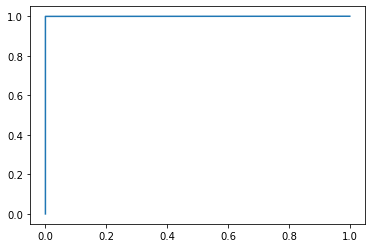

AUC 0.00035790980672872896


In [25]:
#se realiza un analisis de las metricas

#Cross-Validation
kf = KFold(n_splits = 5)#numero de iteraciones
puntuaciones = cross_val_score(modelo_arb_c,x_train , y_train , cv = kf , scoring = "accuracy")
print ("Metricas Cross_validation" , puntuaciones)

#Accuracy
accuracy = accuracy_score( y_true = y_test , y_pred = predicciones, normalize = True)
print(f"el accuracy de test es :  {100*accuracy} %")
#precision tp / (tp + fp)
#precision = precision_score (y_test,predicciones)
#print(f"la precision de test es :  {100*precision} %")

fpr ,tpr , thresholds = metrics.roc_curve (y_test, predicciones,pos_label= 0 )
#Curvas ROC/AUC
plt.plot (tpr,fpr)
plt.show()
auc = np.trapz(tpr,fpr)
print("AUC" , auc)

el modelo de clasificaicon sale con 99.93150684931507% por lo que se considera muy buen modelo